# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


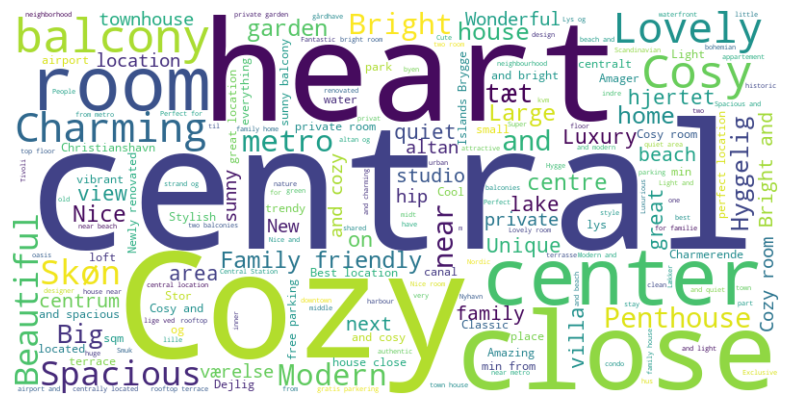

In [6]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

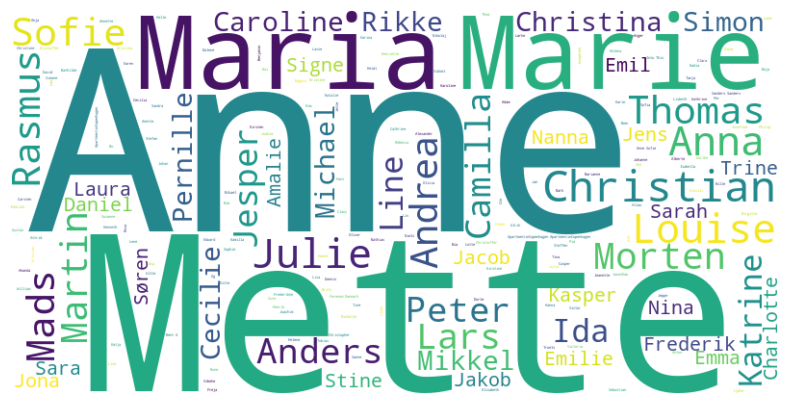

In [10]:
# Get the names of all the hosts in one string
easy_names = ' '.join(data_filtered['host_name'].astype(str))

# Stop words that should be excluded from the from the world cloud
stop_words = [
    "Airbnb",
    "Apartments",
    "Guesthouse",
    "Hostel",
    "Hotel",
    "Property",
    "Square",
    "Retreat",
    "Collection",
    "Family",
    "Management",
    "Hidden",
    "Studio",
    "Suites",
    "Residence",
    "Place",
    "Reception",
    "Den",
    "Space",
    "Stay",
    "House",
    "Home",
    "&", "."
]

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(easy_names)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

c:\Users\fisch\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


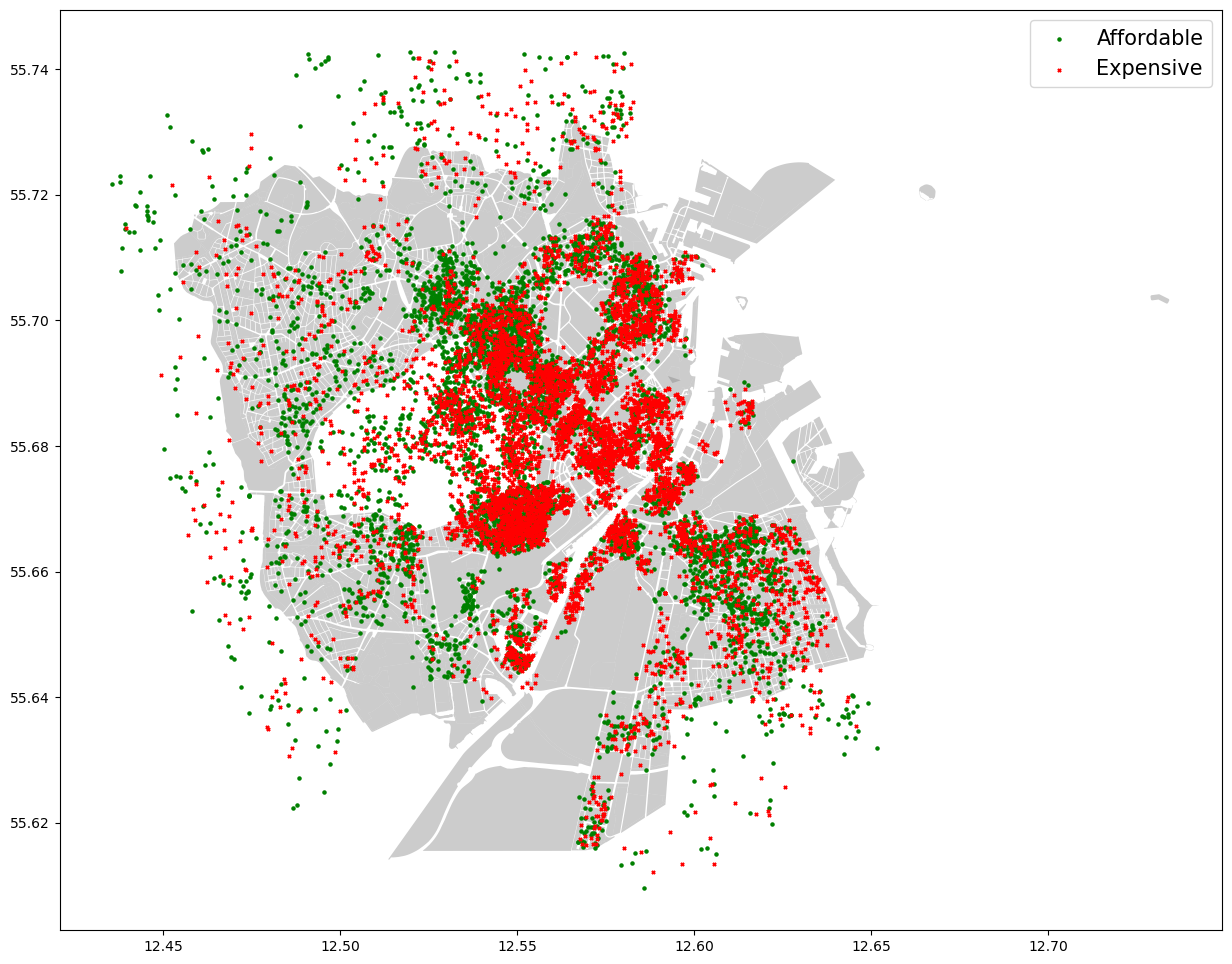

In [2]:
# State your solution here. Add more cells if needed.

# Source of idea: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
# Source of Copenhagen map in .shp format: https://www.opendata.dk/city-of-copenhagen/karre

import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Getting the street map, specifying the coordinate reference system, creating geometry system
street_map = gpd.read_file('karre.shp')
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_filtered['longitude'], data_filtered['latitude'])]

geo_df = gpd.GeoDataFrame(data_filtered, 
                          crs=crs, 
                          geometry=geometry) 
geo_df.head()

fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
# Adding the points on the map based on their price category
geo_df[geo_df['price_category'] == 0].plot(ax=ax, 
                                       markersize=5, 
                                       color='green', 
                                       marker='o', 
                                       label='Affordable')
geo_df[geo_df['price_category'] == 1].plot(ax=ax, 
                                       markersize=5, 
                                       color='red', 
                                       marker='x', 
                                       label='Expensive')
plt.legend(prop={'size':15})


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

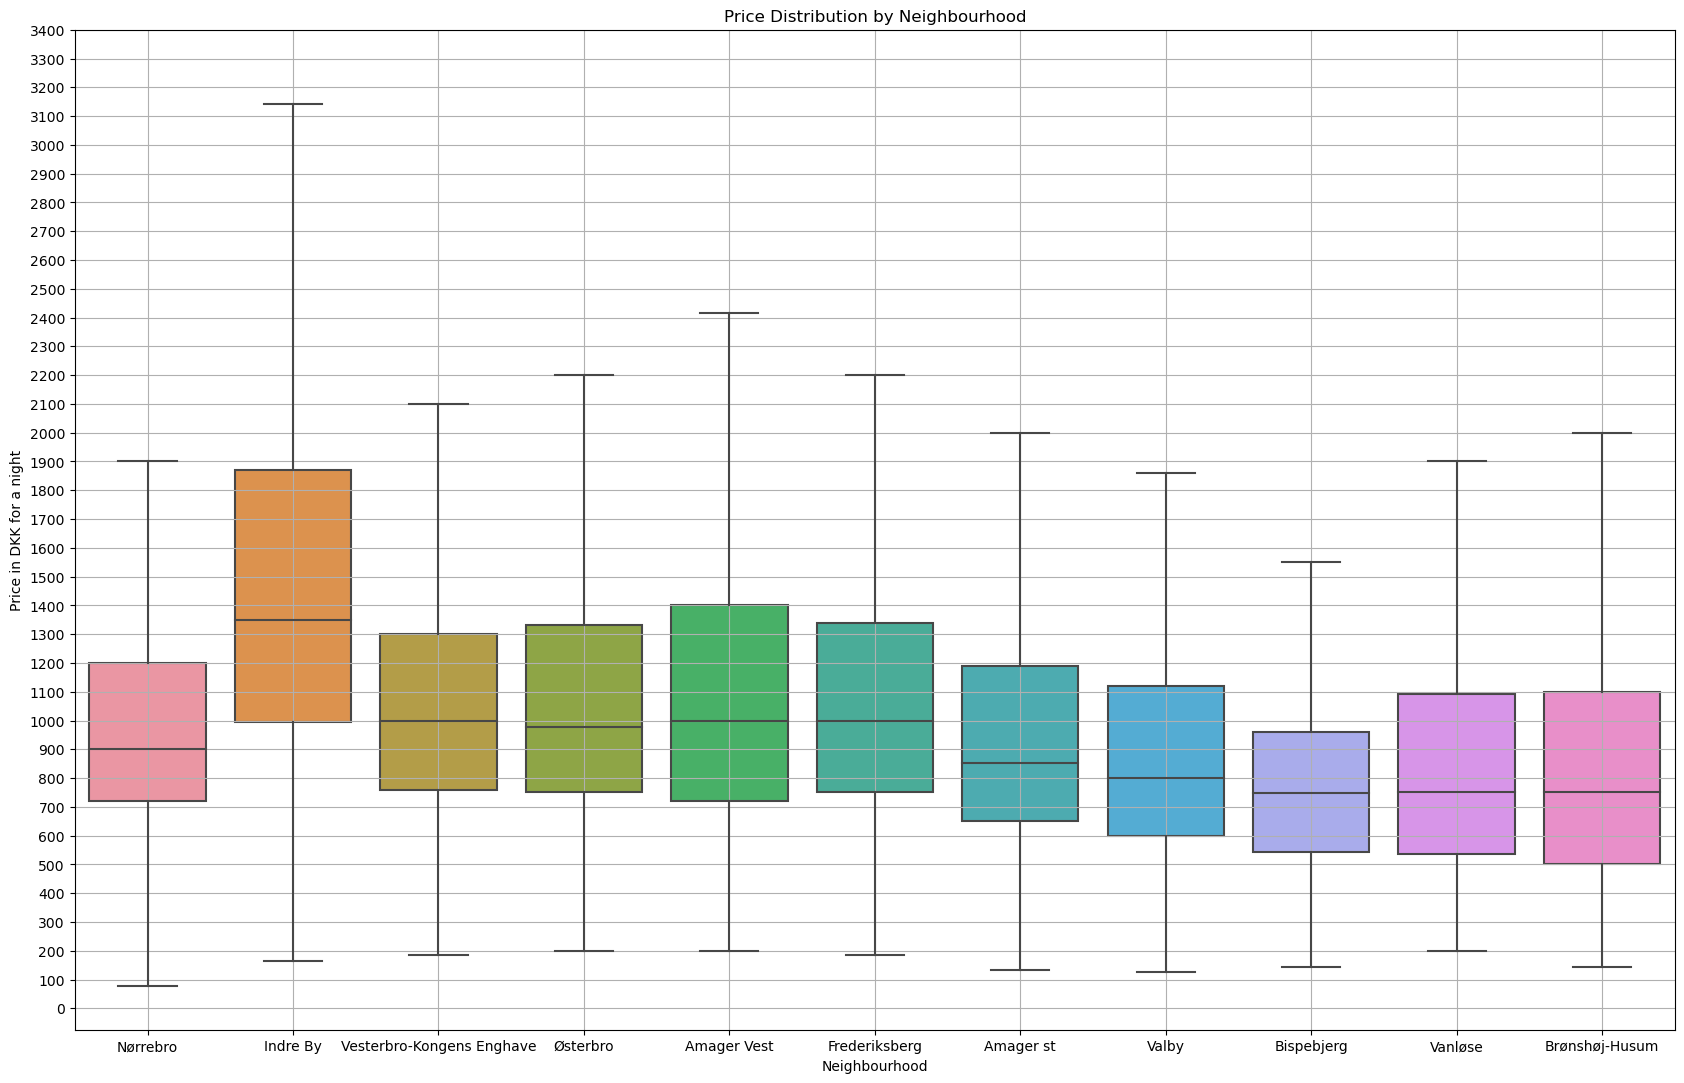

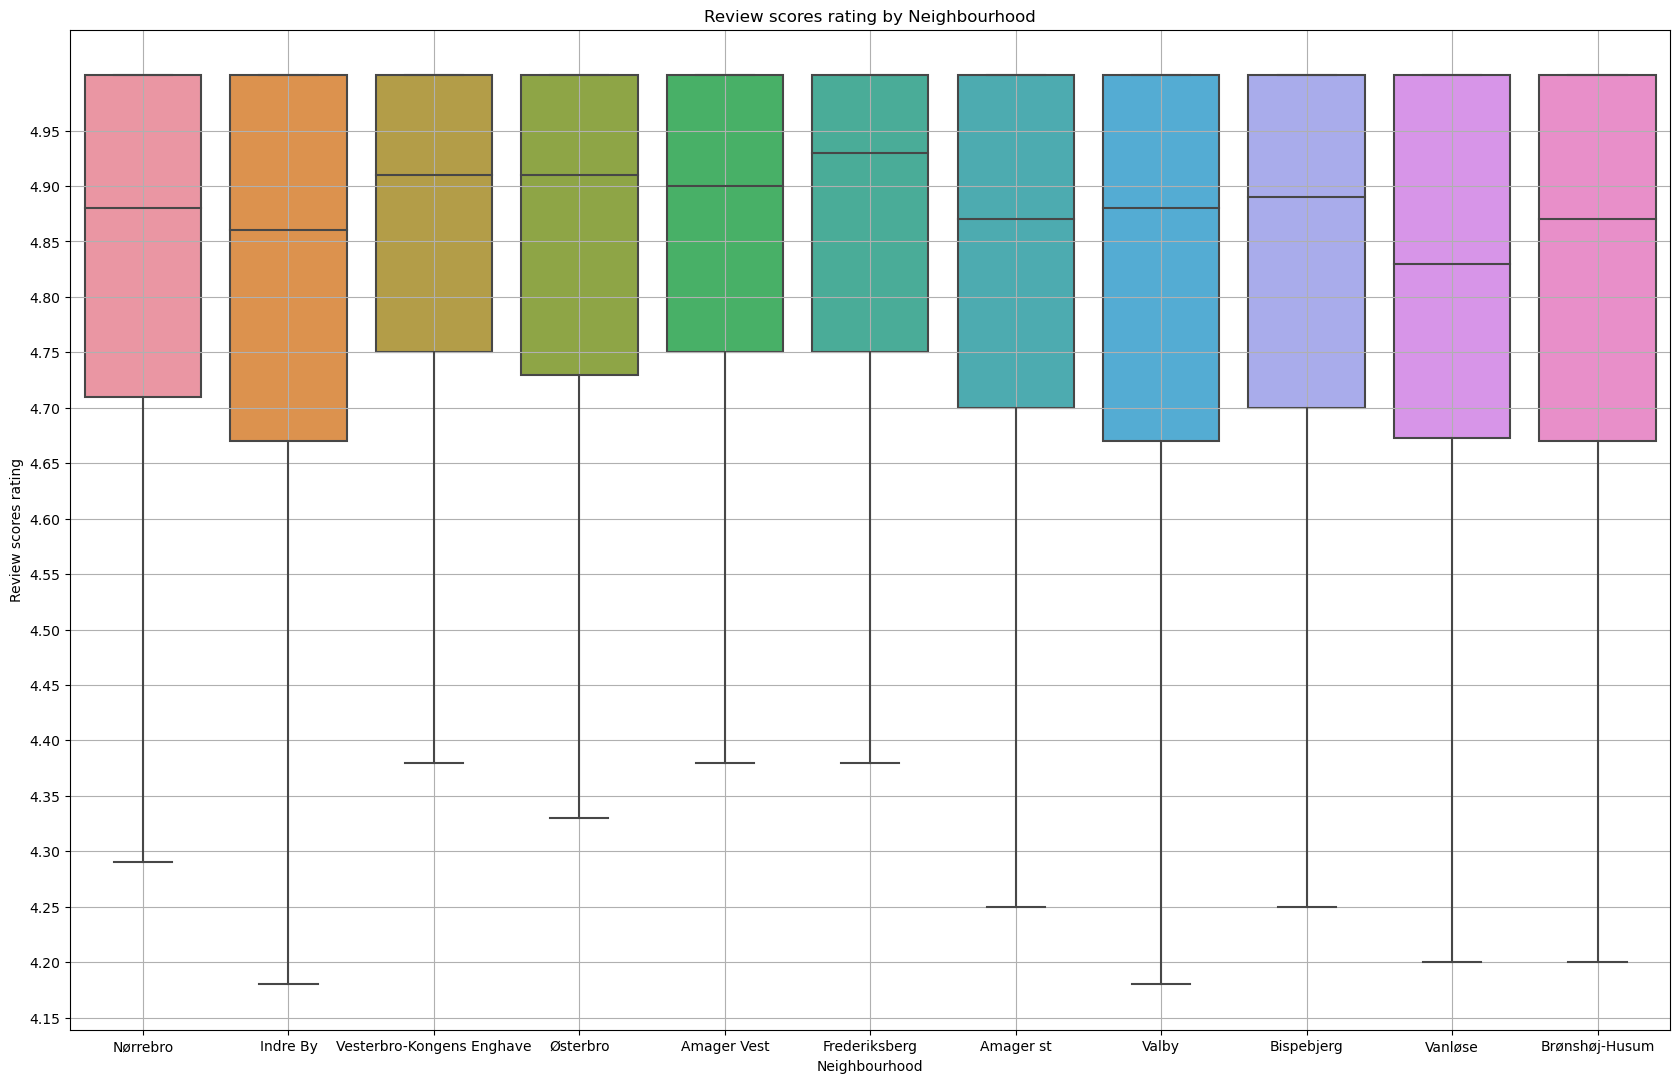

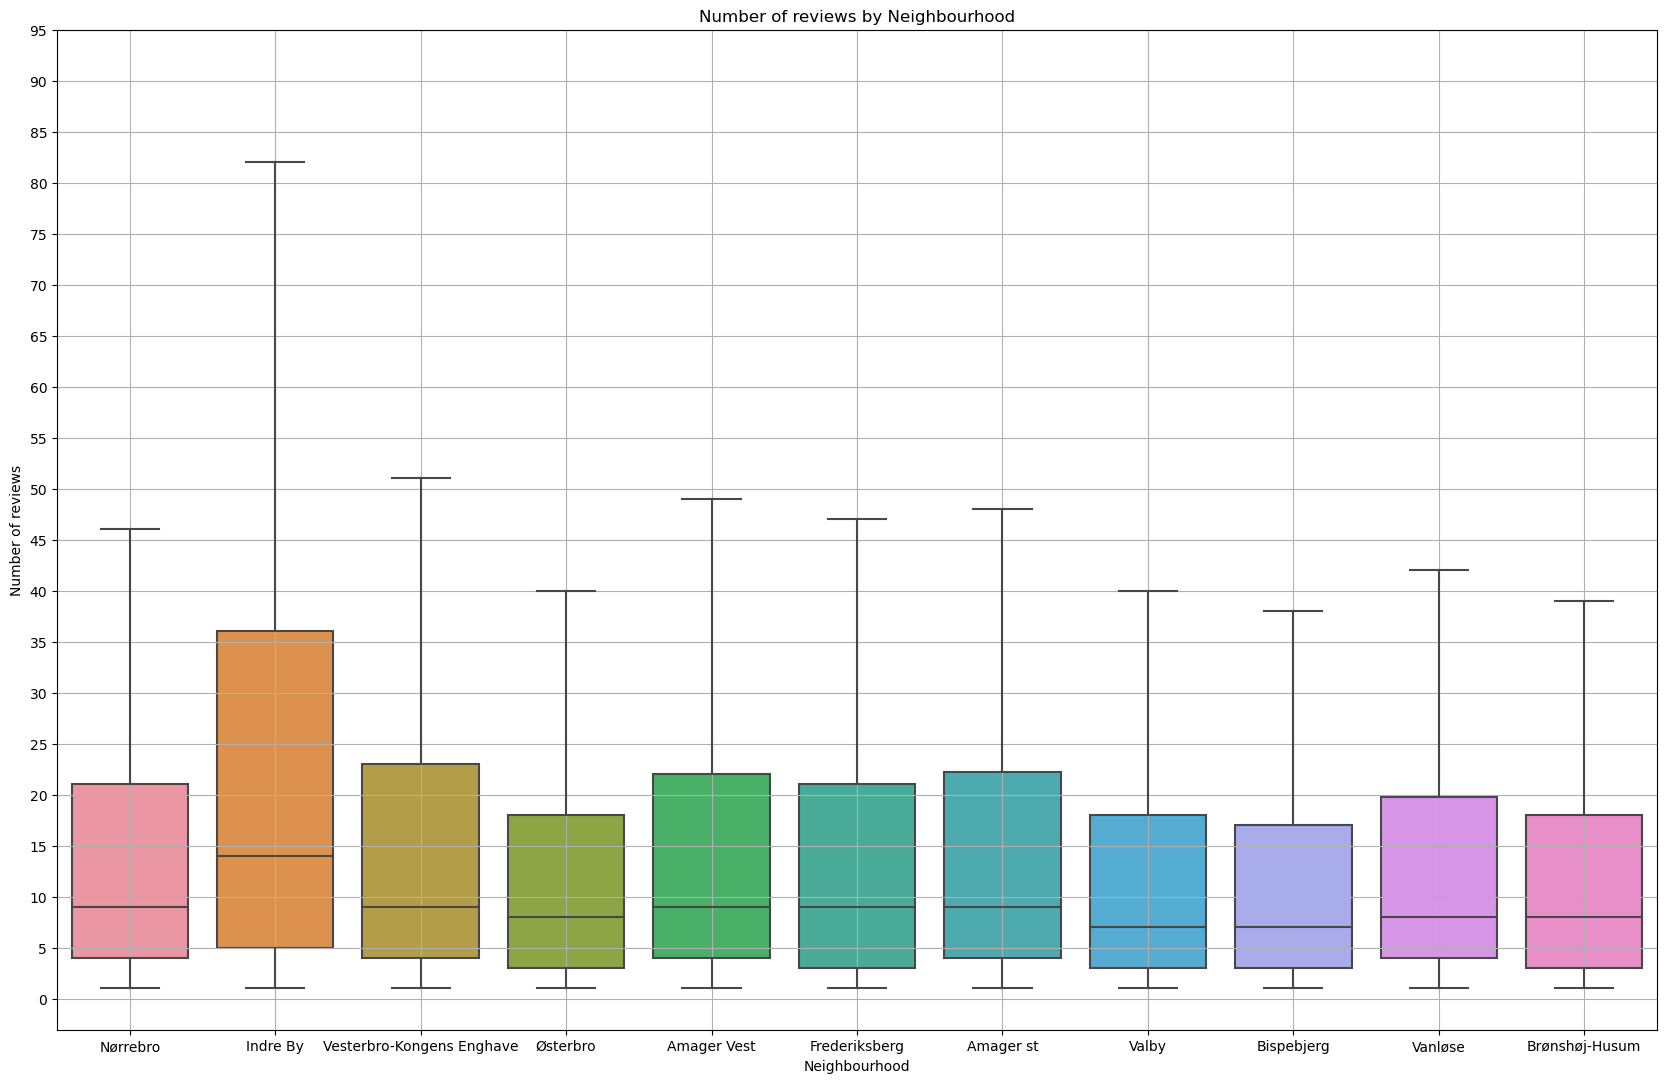

In [60]:
# State your solution here. Add more cells if needed.

import seaborn as sns
import numpy as np
fig = plt.figure(figsize =(16, 10))


# Creating axes instance
ax = fig.add_axes([0, 0,1, 1])
 
# Creating plot 
sns.boxplot(data=data_filtered, x='neighbourhood_cleansed', y='price', showfliers=False)
plt.title('Price Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price in DKK for a night')
plt.yticks(np.arange(0, 3500, 100))
plt.grid(True)
# plt.show()


fig = plt.figure(figsize =(16, 10))
# Creating axes instance
ax = fig.add_axes([0, 0,1, 1])
sns.boxplot(data=data_filtered, x='neighbourhood_cleansed', y='review_scores_rating', showfliers=False)
plt.title('Review scores rating by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Review scores rating')
plt.yticks(np.arange(4.15, 5, 0.05))
plt.grid(True)
# plt.show()

fig = plt.figure(figsize =(16, 10))
# Creating axes instance
ax = fig.add_axes([0, 0,1, 1])
sns.boxplot(data=data_filtered, x='neighbourhood_cleansed', y='number_of_reviews', showfliers=False)
plt.title('Number of reviews by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of reviews')
plt.yticks(np.arange(0,100, 5))
plt.grid(True)
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [42]:
# State your solution here. Add more cells if needed.


pd.set_option('display.precision', 0)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

data_grouped_by_ngbh_room_type = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])
stats = data_grouped_by_ngbh_room_type['price'].describe()

#Calcuating the mode cuz it's not in the describe method and appending it to the stats
mode = data_grouped_by_ngbh_room_type['price'].apply(lambda x: x.mode().iloc[0])
stats['mode'] = mode

print(stats.to_string())


                                           count  mean   std   min   25%   50%   75%    max  mode
neighbourhood_cleansed    room_type                                                              
Amager Vest               Entire home/apt    909  1234   833   250   814  1050  1480  14000  1000
                          Private room       148  1033  5299   200   400   500   655  64900   500
                          Shared room          2  1052   112   972  1012  1052  1091   1131   972
Amager st                 Entire home/apt    791  1094   722   240   700   900  1200  10000  1000
                          Hotel room           3  1296   211  1149  1175  1201  1370   1538  1149
                          Private room       129   549   294   135   400   471   600   2000   450
                          Shared room          1  2575   NaN  2575  2575  2575  2575   2575  2575
Bispebjerg                Entire home/apt    508   993  1982   235   600   800  1000  44000   700
                    

In [45]:
# I have made a descriptive analysis of the data grouped by the neighbourhood and the room type based on the price. There is a lot of data here so I will try to sort it in order to find meaningful information.

stats_mean_desc= stats.sort_values(('mean'), ascending=False)
print(stats_mean_desc.to_string())

# As you can see, the highest average is 2575 DKK for shared room type in Amager St, which is kind of odd price for a shared room. 
# However, as you can see there is only one shared room in Amager St so I believe this is not really meaningful.
# On average when renting an entire home/apt in Indre By one will have to pay the most. Entire home/apt is also the most expensive type of rent on average compared to private room or shared room.


                                           count  mean   std   min   25%   50%   75%    max  mode
neighbourhood_cleansed    room_type                                                              
Amager st                 Shared room          1  2575   NaN  2575  2575  2575  2575   2575  2575
Indre By                  Entire home/apt   1702  1642  1073   350  1021  1400  1911  20000  1200
Amager st                 Hotel room           3  1296   211  1149  1175  1201  1370   1538  1149
Frederiksberg             Entire home/apt   1044  1292  1959   300   822  1037  1400  58000  1000
Østerbro                  Entire home/apt   1174  1249  1439   268   800  1000  1400  41800  1000
Amager Vest               Entire home/apt    909  1234   833   250   814  1050  1480  14000  1000
Vesterbro-Kongens Enghave Entire home/apt   1811  1181   698   300   841  1000  1326  10800  1000
Amager st                 Entire home/apt    791  1094   722   240   700   900  1200  10000  1000
Indre By            

In [46]:
# Now I will try to gain insights into the standard variance.

stats_std_desc = stats.sort_values(('std'), ascending=False)
print(stats_std_desc.to_string())

# The biggest standard variance is in Amager Vest when it comes to renting private rooms. 
# This is definitely related to the fact that in that area there is the most expensive airbnb property for eye-popping 64900 DKK for a night.
# You can also see that the mean value for Amager Vest is relatively low, which means that this room has a strong impact on the standard variance in that case.

# The tuple with the lowest variance with a significant count of listings is a Private Room in Vanlose with only 195 standard variance.

                                           count  mean   std   min   25%   50%   75%    max  mode
neighbourhood_cleansed    room_type                                                              
Amager Vest               Private room       148  1033  5299   200   400   500   655  64900   500
Bispebjerg                Entire home/apt    508   993  1982   235   600   800  1000  44000   700
Frederiksberg             Entire home/apt   1044  1292  1959   300   822  1037  1400  58000  1000
Østerbro                  Entire home/apt   1174  1249  1439   268   800  1000  1400  41800  1000
Indre By                  Entire home/apt   1702  1642  1073   350  1021  1400  1911  20000  1200
Amager Vest               Entire home/apt    909  1234   833   250   814  1050  1480  14000  1000
Nørrebro                  Private room       165   650   760    79   400   500   700   8400   500
Amager st                 Entire home/apt    791  1094   722   240   700   900  1200  10000  1000
Vesterbro-Kongens En

In [50]:
# Finally, let's take a look at the mode. But first let's remove the tuples with count less than 5 so that we have the tuples with a considerable count.

stats_mode_desc = stats.sort_values(('mode'), ascending=False)
filtered_mode_stats = stats_mode_desc[stats_mode_desc['count'] >= 5]
print(filtered_mode_stats.to_string())

# 1000 DKK for a night is a price most occurring in Østerbro, Vesterbro-Kongens Enghave, Nørrebro, Frederiksberg, Amager Vest, Amager st. 
# There are plenty of private rooms with most frequent price being 500 DKK or less.

                                           count  mean   std  min   25%   50%   75%    max  mode
neighbourhood_cleansed    room_type                                                             
Brønshøj-Husum            Entire home/apt    216  1015   556  250   656   900  1250   4462  1400
Indre By                  Hotel room          10  1077   654  204   394  1306  1554   1862  1306
                          Entire home/apt   1702  1642  1073  350  1021  1400  1911  20000  1200
Østerbro                  Entire home/apt   1174  1249  1439  268   800  1000  1400  41800  1000
Vesterbro-Kongens Enghave Entire home/apt   1811  1181   698  300   841  1000  1326  10800  1000
Nørrebro                  Entire home/apt   1889  1048   584  216   750   950  1200  12500  1000
Frederiksberg             Entire home/apt   1044  1292  1959  300   822  1037  1400  58000  1000
Amager Vest               Entire home/apt    909  1234   833  250   814  1050  1480  14000  1000
Amager st                 Enti

### 5. Based on self-chosen features, develop a logistic regression mode and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression






data_trimmed = data_filtered.drop(["review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365", "last_review"  ,  "latitude"  ,
    "longitude"  , "id",
    "name",
    "host_id"  ,
    "host_name" ,
    "room_type", 
    "neighbourhood_cleansed"
     ], axis='columns')

y = data_trimmed['price_category']
X = data_trimmed.drop(['price_category'], axis='columns')

print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Try to remove random_state

# # Define the range of hyperparameters to test
# neighbors_range = range(3, 20)  # Number of neighbors from 3 to 19
# distance_metrics = ['euclidean', 'manhattan', ('minkowski')]  # Common distance metrics, only illustration, doesn't make sense!

# # Variables to store the best parameters and highest accuracy
# best_accuracy = 0
# best_params = {'n_neighbors': None, 'metric': None}

# # Nested loop to iterate over the hyperparameters
# for n_neighbors in neighbors_range:
#     for metric in distance_metrics:
#         # Initialize the KNN model with current hyperparameters
#         knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

#         # Train the model
#         knn.fit(X_train, y_train)

#         # Make predictions on the test set
#         predictions = knn.predict(X_test)

#         # Calculate the accuracy
#         accuracy = accuracy_score(y_test, predictions)

#         # Update the best parameters if current accuracy is higher
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_params['n_neighbors'] = n_neighbors
#             best_params['metric'] = metric

# # Print the best set of parameters and the highest accuracy achieved
# print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
# print(f"Highest Accuracy: {best_accuracy*100:.2f}%")


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

log_reg.predict([[975.0,3,450,4.98]]) # Seems like the price becomes expensive when reaching 975/980 DKK


        price  minimum_nights  number_of_reviews  review_scores_rating
0       898.0               3                172                  4.78
1      2600.0               4                 59                  4.91
2      3250.0               3                300                  4.53
3       725.0               7                 24                  4.92
4      1954.0               3                 19                  4.88
...       ...             ...                ...                   ...
13808   856.0               6                  4                  4.75
13809  1050.0               2                  4                  5.00
13811   450.0               3                  3                  5.00
13812   400.0               1                  3                  5.00
13814   420.0               2                  1                  5.00

[12126 rows x 4 columns]


c:\Users\fisch\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\fisch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])